<a href="https://colab.research.google.com/github/kshwan95/Machine-Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A09_1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [8]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [9]:
print(len(train_input[0]))

218


In [10]:
print(len(train_input[1]))

189


In [11]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [12]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [13]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target,test_size=0.2, random_state=42
)

In [14]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [15]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


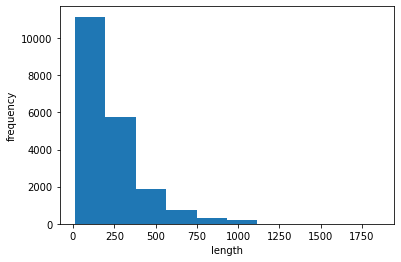

In [16]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [18]:
print(train_seq.shape)

(20000, 100)


In [19]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [20]:
val_seq = pad_sequences(val_input,maxlen=100)

In [21]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [22]:
train_oh = keras.utils.to_categorical(train_seq)

In [23]:
print(train_oh.shape)

(20000, 100, 500)


In [24]:
val_oh = keras.utils.to_categorical(val_seq)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh,train_target,epochs=100,batch_size=64,
                    validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6980 - accuracy: 0.5101 - val_loss: 0.6958 - val_accuracy: 0.5084
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6940 - accuracy: 0.5207 - val_loss: 0.6933 - val_accuracy: 0.5184
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6911 - accuracy: 0.5281 - val_loss: 0.6911 - val_accuracy: 0.5286
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6885 - accuracy: 0.5385 - val_loss: 0.6893 - val_accuracy: 0.5394
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6860 - accuracy: 0.5469 - val_loss: 0.6874 - val_accuracy: 0.5446
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6835 - accuracy: 0.5536 - val_loss: 0.6854 - val_accuracy: 0.5524
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6806 - accuracy: 0.5655 - val_loss: 0.6830 - val_ac

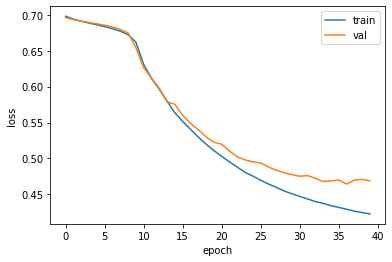

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6820 - accuracy: 0.5692 - val_loss: 0.6653 - val_accuracy: 0.6342
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6518 - accuracy: 0.6692 - val_loss: 0.6417 - val_accuracy: 0.6914
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6277 - accuracy: 0.7135 - val_loss: 0.6205 - val_accuracy: 0.7214
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6058 - accuracy: 0.7389 - val_loss: 0.6037 - val_accuracy: 0.7308
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5851 - accuracy: 0.7544 - val_loss: 0.5826 - val_accuracy: 0.7478
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5647 - accuracy: 0.7679 - val_loss: 0.5683 - val_accuracy: 0.7474
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5445 - accuracy: 0.7746 - val_loss: 0.5451 - val_accuracy:

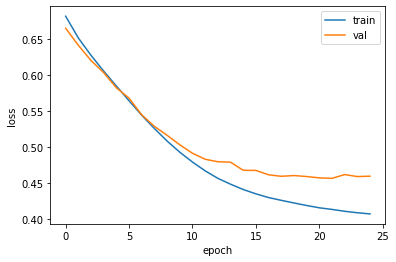

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [36]:
#lstm 신경망
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target,test_size=0.2, random_state=42
)


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [39]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [41]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
250/250 [==============================] - 9s 29ms/step - loss: 0.6923 - accuracy: 0.5322 - val_loss: 0.6919 - val_accuracy: 0.5285
Epoch 2/100
250/250 [==============================] - 7s 27ms/step - loss: 0.6900 - accuracy: 0.5763 - val_loss: 0.6892 - val_accuracy: 0.5717
Epoch 3/100
250/250 [==============================] - 7s 27ms/step - loss: 0.6858 - accuracy: 0.6184 - val_loss: 0.6836 - val_accuracy: 0.6200
Epoch 4/100
250/250 [==============================] - 7s 27ms/step - loss: 0.6768 - accuracy: 0.6495 - val_loss: 0.6698 - val_accuracy: 0.6643
Epoch 5/100
250/250 [==============================] - 7s 27ms/step - loss: 0.6428 - accuracy: 0.6963 - val_loss: 0.5970 - val_accuracy: 0.7180
Epoch 6/100
250/250 [==============================] - 7s 27ms/step - loss: 0.5723 - accuracy: 0.7239 - val_loss: 0.5577 - val_accuracy: 0.7340
Epoch 7/100
250/250 [==============================] - 7s 27ms/step - loss: 0.5490 - accuracy: 0.7398 - val_loss: 0.5388 - val_accuracy:

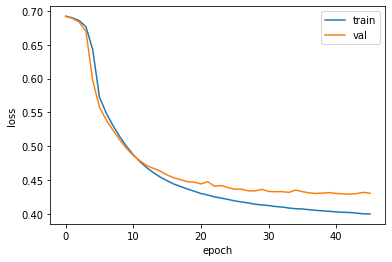

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [45]:
#드롭아웃
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [46]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
250/250 [==============================] - 9s 31ms/step - loss: 0.6927 - accuracy: 0.5275 - val_loss: 0.6923 - val_accuracy: 0.5430
Epoch 2/100
250/250 [==============================] - 7s 29ms/step - loss: 0.6910 - accuracy: 0.5761 - val_loss: 0.6897 - val_accuracy: 0.6018
Epoch 3/100
250/250 [==============================] - 7s 29ms/step - loss: 0.6861 - accuracy: 0.6151 - val_loss: 0.6810 - val_accuracy: 0.5910
Epoch 4/100
250/250 [==============================] - 7s 29ms/step - loss: 0.6608 - accuracy: 0.6275 - val_loss: 0.6338 - val_accuracy: 0.7067
Epoch 5/100
250/250 [==============================] - 7s 29ms/step - loss: 0.6186 - accuracy: 0.7134 - val_loss: 0.6064 - val_accuracy: 0.7293
Epoch 6/100
250/250 [==============================] - 7s 29ms/step - loss: 0.6007 - accuracy: 0.7278 - val_loss: 0.5889 - val_accuracy: 0.7442
Epoch 7/100
250/250 [==============================] - 7s 29ms/step - loss: 0.5811 - accuracy: 0.7477 - val_loss: 0.5749 - val_accuracy:

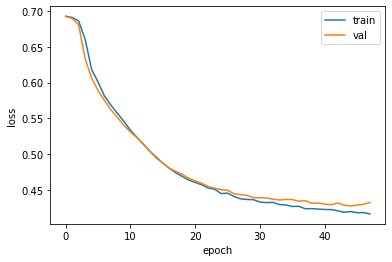

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [48]:
#2개의 층 연결
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [50]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
250/250 [==============================] - 17s 56ms/step - loss: 0.6930 - accuracy: 0.5046 - val_loss: 0.6929 - val_accuracy: 0.5055
Epoch 2/100
250/250 [==============================] - 13s 51ms/step - loss: 0.6923 - accuracy: 0.5324 - val_loss: 0.6919 - val_accuracy: 0.5307
Epoch 3/100
250/250 [==============================] - 13s 51ms/step - loss: 0.6906 - accuracy: 0.5698 - val_loss: 0.6889 - val_accuracy: 0.5965
Epoch 4/100
250/250 [==============================] - 13s 52ms/step - loss: 0.6836 - accuracy: 0.6356 - val_loss: 0.6747 - val_accuracy: 0.5738
Epoch 5/100
250/250 [==============================] - 13s 52ms/step - loss: 0.6405 - accuracy: 0.6602 - val_loss: 0.6055 - val_accuracy: 0.7170
Epoch 6/100
250/250 [==============================] - 13s 53ms/step - loss: 0.5817 - accuracy: 0.7158 - val_loss: 0.5632 - val_accuracy: 0.7280
Epoch 7/100
250/250 [==============================] - 14s 54ms/step - loss: 0.5512 - accuracy: 0.7351 - val_loss: 0.5347 - val_ac

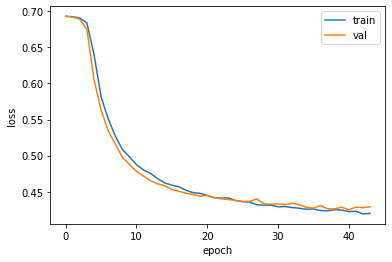

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()